In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def find(string, sub, n):
    index = 0
    newstr = string
    for i in range(n):
        index = newstr.index(sub, index+1)
        newstr = newstr[index+1:]
        # print(newstr)
        # print("ahem")
        # print(index)
    
    return index

activation_time = 1

with open('scheme3d.shm') as f:
    lines = f.readlines()

start = lines.index('# a b m n err i ip iperr k r rhoa u valid \n')
scheme = lines[start:][1:-1]

elec_combos = np.array([scheme[i].split() for i in range(len(scheme))]).astype(float)

a = np.transpose(elec_combos)[0]
b = np.transpose(elec_combos)[1]
m = np.transpose(elec_combos)[2]
n = np.transpose(elec_combos)[3]

print("STARTING DIPOLE DIPOLE SCHEME FOR", len(a), "ELECTRODE COMBINATIONS")
print("Estimated time for one cycle: ", round(activation_time*2*len(a)/60), " minutes.")

STARTING DIPOLE DIPOLE SCHEME FOR 1891 ELECTRODE COMBINATIONS
Estimated time for one cycle:  63  minutes.


In [4]:
start = scheme[1].index('\t', 1)
end = scheme[1].index('\t', 1)
print(scheme[0])
scheme[0][0:scheme[0].index('\t', 1)]
scheme[0][scheme[0].index('\t', 1)]
scheme[0].index('\t')
scheme[0][scheme[0].index('\t')+1:]

1	2	3	4	0.00000000000000e+00	0.00000000000000e+00	0.00000000000000e+00	0.00000000000000e+00	0.00000000000000e+00	0.00000000000000e+00	0.00000000000000e+00	0.00000000000000e+00	1



'2\t3\t4\t0.00000000000000e+00\t0.00000000000000e+00\t0.00000000000000e+00\t0.00000000000000e+00\t0.00000000000000e+00\t0.00000000000000e+00\t0.00000000000000e+00\t0.00000000000000e+00\t1\n'

In [5]:
b = [(scheme[0][scheme[0].index('\t', 1)+2:scheme[0].index('\t', 2)]) for i in range(1, len(scheme))]

In [6]:
# print(scheme[0])
ind = find(scheme[30], '\t', 1)
ind2 = find(scheme[30], '\t', 2)
print(scheme[30][ind+1:ind2])

32


In [7]:
# a = [int(scheme[i][0:scheme[i].index('\t')]) for i in range(len(scheme))]
 
# #    find(scheme[i], '\t', 1)

# b = [(scheme[i][find(scheme[30], '\t', 0)+1:find(scheme[30], '\t', 1)]) for i in range(1, len(scheme))]
# m = [int(scheme[i][find(scheme[30], '\t', 1):find(scheme[30], '\t', 2)]) for i in range(1, len(scheme))]
# n = [int(scheme[i][find(scheme[30], '\t', 2):find(scheme[30], '\t', 3)]) for i in range(1, len(scheme))]


In [8]:
import time
repeat = 65
duration = 5*60
print("STARTING DIPOLE DIPOLE SCHEME FOR", len(a), "ELECTRODE COMBINATIONS")
print("Time: ", time.ctime(time.time()))
print("Estimated time for one cycle: ", round(activation_time*2*len(a)/60), " minutes.")
print("Repeating cycle every ", repeat, " minutes.")
print("FINISHED CYCLE. SLEEPING FOR ", round(repeat - duration/60), "MINUTES.")

STARTING DIPOLE DIPOLE SCHEME FOR 1891 ELECTRODE COMBINATIONS
Time:  Thu Nov 17 23:45:04 2022
Estimated time for one cycle:  63  minutes.
Repeating cycle every  65  minutes.
FINISHED CYCLE. SLEEPING FOR  60 MINUTES.


In [344]:
def resistivity_rule(x, y, z, t, rule="rainfall"):
    if rule=="hom":
        return np.zeros(x.shape)+100
    if rule=="rainfall":
        moisture = np.exp(-1*z)*(t+1)
        #print(moisture)
        return 100*moisture # 100 initial dry resistivity
        
    else:
        print("wrong rule choice")

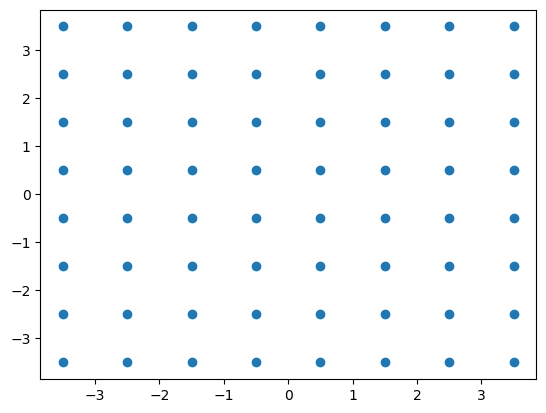

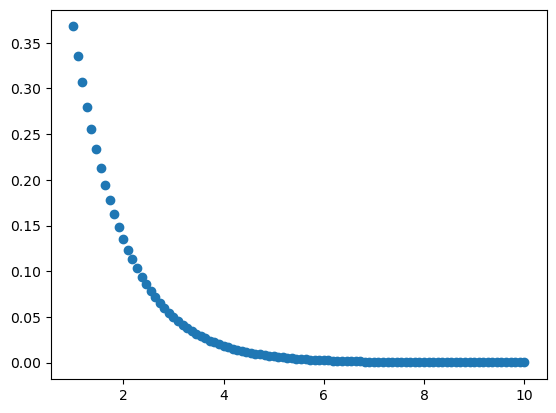

In [345]:
#TESTING
# create electrode scheme
x = np.linspace(-3.5, 3.5, 8)
y = np.linspace(-3.5, 3.5, 8)

xx, yy = np.meshgrid(x, y)

plt.scatter(xx, yy)
plt.show()

elec_nums = np.linspace(1, 64, 64).reshape(xx.shape)
positions = np.transpose(np.vstack([xx.ravel(), yy.ravel(), np.zeros(xx.shape).ravel()]))

ttest = np.linspace(1, 10, 100)
plt.scatter(ttest, np.exp(-1*ttest))

In [346]:
#create a dipole-dipole scheme
from pygimli.physics import ert
import pygimli as pg
scheme = ert.createData(elecs=np.linspace(start=-3.5, stop=3.5, num=8),
                           schemeName='dd')

print(elec_nums)

ainit = scheme['a']
binit = scheme['b']
minit = scheme['m']
ninit = scheme['n']
check = np.transpose(np.array((ainit, binit, minit, ninit)))

print(len(ainit))

scheme = ert.createData(elecs=0,schemeName='dd')

[scheme.createSensor(positions[i]) for i in range(len(positions))]
for st in np.transpose(elec_nums)[0]:
    [scheme.addFourPointData((check+st)[i]) for i in range(len(check))]

for st in elec_nums[0]:
    [scheme.addFourPointData((check*8+st)[i]) for i in range(len(check))]

print(scheme.sensors())
scheme.save("test.txt")
scheme

[[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 9. 10. 11. 12. 13. 14. 15. 16.]
 [17. 18. 19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30. 31. 32.]
 [33. 34. 35. 36. 37. 38. 39. 40.]
 [41. 42. 43. 44. 45. 46. 47. 48.]
 [49. 50. 51. 52. 53. 54. 55. 56.]
 [57. 58. 59. 60. 61. 62. 63. 64.]]
15
R3Vector: n=64


Data: Sensors: 64 data: 240, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

In [347]:
def ves(combo, xgrid, ygrid, t, model, i=0.05, noiseLevel=0.01, elecs=elec_nums):
    ax = xgrid[np.where(elecs==combo[0])]
    ay = ygrid[np.where(elecs==combo[0])]
    bx = xgrid[np.where(elecs==combo[1])]
    by = ygrid[np.where(elecs==combo[1])]
    mx = xgrid[np.where(elecs==combo[2])]
    my = ygrid[np.where(elecs==combo[2])]
    nx = xgrid[np.where(elecs==combo[3])]
    ny = ygrid[np.where(elecs==combo[3])]
    
    # print(ax, ay, bx, by, mx, my, nx, ny)
    
    k = 2*np.pi/(((ax-mx)**2 + (ay-my)**2)**-0.5 - ((bx-mx)**2 + (by-my)**2)**-0.5 - ((ax-nx)**2 + (ay-ny)**2)**-0.5 + ((bx-nx)**2 + (by-ny)**2)**-0.5)

    x = ((ax+bx)/2 - (mx+nx)/2)/2
    y = ((ay+by)/2 - (my+ny)/2)/2
    z = 0.2*(((ax+bx)/2 - (mx + nx)/2)**2 + ((ay+by)/2 - (my+ny)/2)**2)**0.5
    
    p = model(x, y, z, t)
    
    v0 = p*i/k # calculate DC potential
    
    v0+= np.random.normal(0,noiseLevel,1) # add gaussian noise
    
    return abs(v0), [x, y, z], p

def charging(v, i, c, t, vs):
    capv = v + vs*(1 - np.exp(-1*t/(v*c/i)))
    capv[0] = 0 # not sure if this is okay to do.
    return capv

def discharging(v, i, c, t, vs):
    capv = vs*np.exp(-1*t/(v*c/i))
    capv[0] = v + vs
    return capv

def full_curve(v, i, c, t, vs, noiseLevel=0):
    t2 = t + max(t)
    return (np.concatenate((t, t2)), np.concatenate((charging(v, i, c, t, vs), discharging(v, i, c, t, vs))) + np.random.normal(0,noiseLevel,len(t)*2))



[0.19504706] [67.0320046]


Text(0, 0.5, 'Voltage (V)')

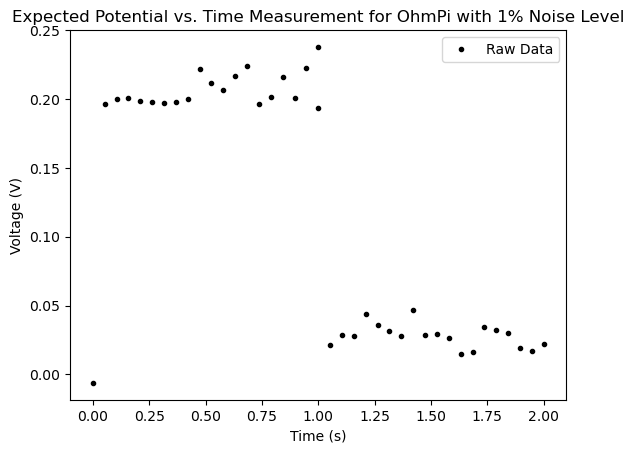

In [348]:

v, xyz, rhoa = ves((check+1)[0], xx, yy, t=0, model=resistivity_rule, i=0.05, noiseLevel=0.01, elecs=elec_nums)
print(v, rhoa)
t = np.linspace(0, 1, 20)
tnew, resp = full_curve(v, i=0.05, c=0.5, t=t, vs=0.20*v, noiseLevel=0.008)
plt.plot(tnew, resp, "k.", label="Raw Data")
#plt.plot(full_curve(i, r, c, t, vs)[0], smooth(full_curve(i, r, c, t, vs)[1]), "r", label="Smoothed")
plt.legend()
plt.title("Expected Potential vs. Time Measurement for OhmPi with 1% Noise Level")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

In [352]:
import pandas as pd
df = pd.DataFrame()

# d = {}

for i in range(len(scheme['a'])):
    quad = [scheme['a'][i], scheme['b'][i], scheme['m'][i], scheme['n'][i]]
    i = 0.05
    v, xyz, rhoa = ves(quad, xx, yy, t=0, model=resistivity_rule, i=i, noiseLevel=0.01, elecs=elec_nums)
    tnew, resp = full_curve(v, i=0.05, c=0.5, t=t, vs=0.20*v, noiseLevel=0.008)
    d = {
                "time": time.time(),
                "A": quad[0],
                "B": quad[1],
                "M": quad[2],
                "N": quad[3],
                "inj time [ms]": activation_time,
                "Vmn [mV]": v[0],
                "I [mA]": i,
                "R [ohm]": v[0]/i,
                "Nb samples [-]": len(t),
                "x":xyz[0],
                "y":xyz[1],
                "z":xyz[2],
                "Rhoa":rhoa,
                "fulldata": [tnew, resp],
            }
    
    df_dictionary = pd.DataFrame([d])
    df = pd.concat([df, df_dictionary], ignore_index=True)
    

df.to_csv("simple_rainfall.csv")

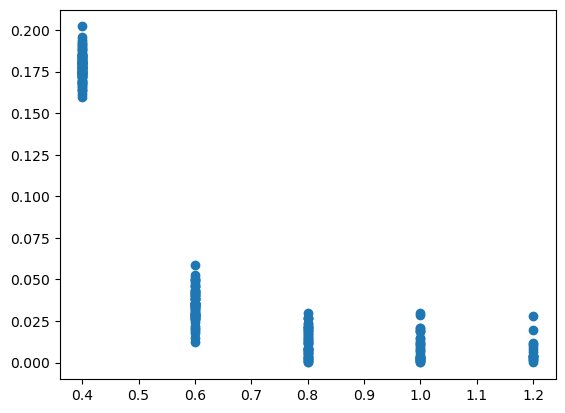

In [350]:
z =np.array(df["z"])
rho = np.array(df["Rhoa"])
va = np.array(df["Vmn [mV]"])

#plt.scatter(z, rho)
plt.scatter(z, va)

df.to_csv("hommodel.csv")

Text(0, 0.5, 'Voltage (arb. units)')

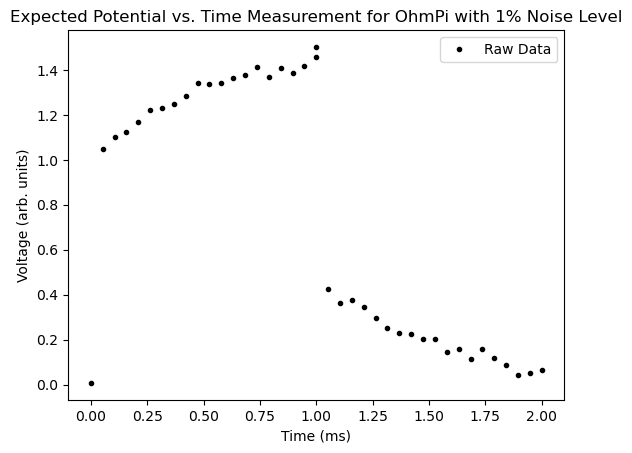

In [301]:
# Charging/discharging template

def charging(v, i, c, t, vs):
    capv = v + vs*(1 - np.exp(-1*t/(v*c/i)))
    capv[0] = 0 # not sure if this is okay to do.
    return capv

def discharging(v, i, c, t, vs):
    capv = vs*np.exp(-1*t/(v*c/i))
    capv[0] = v + vs
    return capv

def full_curve(v, i, c, t, vs, noiseLevel=0.02):
    t2 = t + max(t)
    return (np.concatenate((t, t2)), np.concatenate((charging(v, i, c, t, vs), discharging(v, i, c, t, vs))) + np.random.normal(0,noiseLevel,len(t)*2))

i = 1
r = 1
c = 0.5
vs = 0.5
plt.plot(full_curve(i, r, c, t, vs)[0], full_curve(i, r, c, t, vs)[1], "k.", label="Raw Data")
#plt.plot(full_curve(i, r, c, t, vs)[0], smooth(full_curve(i, r, c, t, vs)[1]), "r", label="Smoothed")
plt.legend()
plt.title("Expected Potential vs. Time Measurement for OhmPi with 1% Noise Level")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (arb. units)")

In [355]:
def format_scheme(scheme_file):
    df = pd.read_csv(scheme_file)

    return df["A"], df["B"], df["M"], df["N"]

In [359]:
format_scheme("hommodel.csv")
df.iloc[3]

time                                              1668791493.159221
A                                                                 4
B                                                                 5
M                                                                 6
N                                                                 7
inj time [ms]                                                     1
Vmn [mV]                                                   0.149887
I [mA]                                                         0.05
R [ohm]                                                    2.997737
Nb samples [-]                                                   20
x                                                            [-1.0]
y                                                             [0.0]
z                                                             [0.4]
Rhoa                                            [67.03200460356393]
fulldata          [[0.0, 0.05263157894736842, 0.

In [368]:
row = df.iloc[0]
print(f"Time: {row['time']}  Injection Time: {row['inj time [ms]']} Injected Current (A): {row['I [mA]']}  Measured Potential (V): {row['Vmn [mV]']}  Rhoa (ohmm): {row['Rhoa'][0]}  Acq. Depth (m): {row['z'][0]}")

Time: 1668791493.152757  Injection Time: 1 Injected Current (A): 0.05  Measured Potential (V): 0.20137626757438537  Rhoa (ohmm): 67.03200460356393  Acq. Depth (m): 0.4


In [363]:
print(f"Time: {row["time"]}")

SyntaxError: f-string: unmatched '[' (3485877483.py, line 1)

In [428]:
import csv
lines=[]
with open("simple_rainfall.csv", "r") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        # print('line[{}] = {}'.format(i, line))
        lines.append(line)
len(np.transpose(np.array(lines)))

# count = 1
# for i in range(int(len(lines)/15)):
#     print(lines[count])
#     print("jhgj")
#     count+=15

16

In [454]:
def read_csv(fn="simple_rainfall.csv"):
    lines=[]
    with open("simple_rainfall.csv", "r") as f:
        reader = csv.reader(f, delimiter=",")
        for i, line in enumerate(reader):
            lines.append(line)
            
    dat = np.transpose(np.array(lines))
    #print(dat)
    d = {}
    for i in range(len(dat)):
        d[dat[i][0]] = dat[i][1:]
    return d

In [463]:
d = read_csv()
time.time()

1668801867.647462

In [444]:
pd.DataFrame(read_csv())

,,time,A,B,M,N,inj time [ms],Vmn [mV],I [mA],R [ohm],Nb samples [-],x,y,z,Rhoa,fulldata
0,0,1668791493.152757,1,2,3,4,1,0.20137626757438537,0.05,4.027525351487707,20,[-1.],[0.],[0.4],[67.0320046],"[array([0. , 0.05263158, 0.10526316, 0...."
1,1,1668791493.1546712,2,3,4,5,1,0.15492560367215727,0.05,3.0985120734431453,20,[-1.],[0.],[0.4],[67.0320046],"[array([0. , 0.05263158, 0.10526316, 0...."
2,2,1668791493.1569731,3,4,5,6,1,0.1612566129218576,0.05,3.225132258437152,20,[-1.],[0.],[0.4],[67.0320046],"[array([0. , 0.05263158, 0.10526316, 0...."
3,3,1668791493.159221,4,5,6,7,1,0.14988684412301936,0.05,2.997736882460387,20,[-1.],[0.],[0.4],[67.0320046],"[array([0. , 0.05263158, 0.10526316, 0...."
4,4,1668791493.160745,5,6,7,8,1,0.17437736504109558,0.05,3.4875473008219116,20,[-1.],[0.],[0.4],[67.0320046],"[array([0. , 0.05263158, 0.10526316, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,1668791493.5915232,16,24,48,56,1,0.0014650051030034132,0.05,0.029300102060068264,20,[0.],[-2.],[0.8],[44.93289641],"[array([0. , 0.05263158, 0.10526316, 0...."
236,236,1668791493.592792,24,32,56,64,1,0.02073459384800824,0.05,0.41469187696016474,20,[0.],[-2.],[0.8],[44.93289641],"[array([0. , 0.05263158, 0.10526316, 0...."
237,237,1668791493.594029,8,16,48,56,1,0.004875815623733477,0.05,0.09751631247466953,20,[0.],[-2.5],[1.],[36.78794412],"[array([0. , 0.05263158, 0.10526316, 0...."
238,238,1668791493.595254,16,24,56,64,1,0.013882608704171835,0.05,0.2776521740834367,20,[0.],[-2.5],[1.],[36.78794412],"[array([0. , 0.05263158, 0.10526316, 0...."
